Shape of the dataset: (500, 8)

Missing values per column:
 Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

Number of duplicate rows: 0

Data types:
 Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

Summary statistics:
        Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.0820

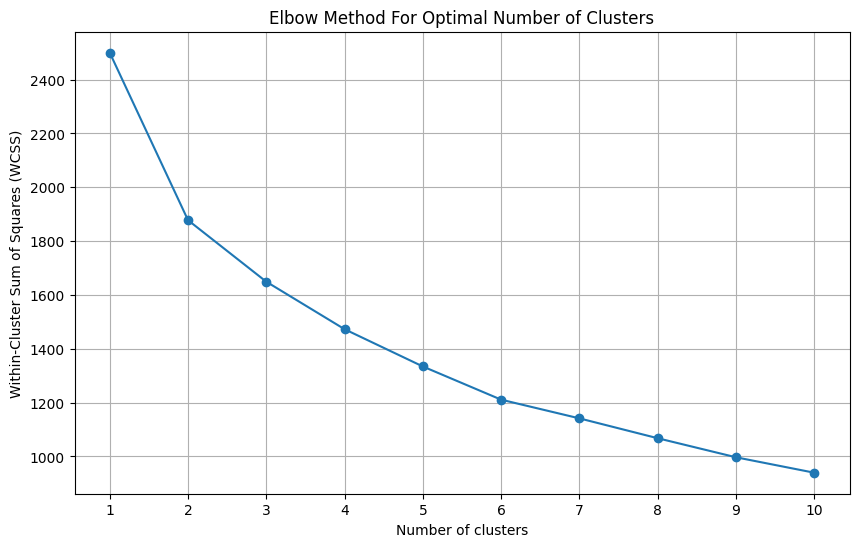


Cluster counts:
Cluster
1    149
3    135
0    118
2     98
Name: count, dtype: int64


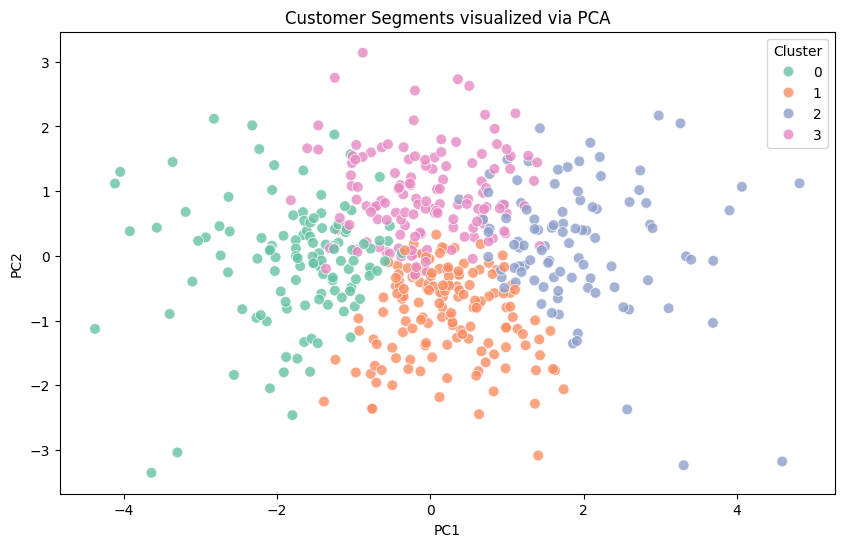

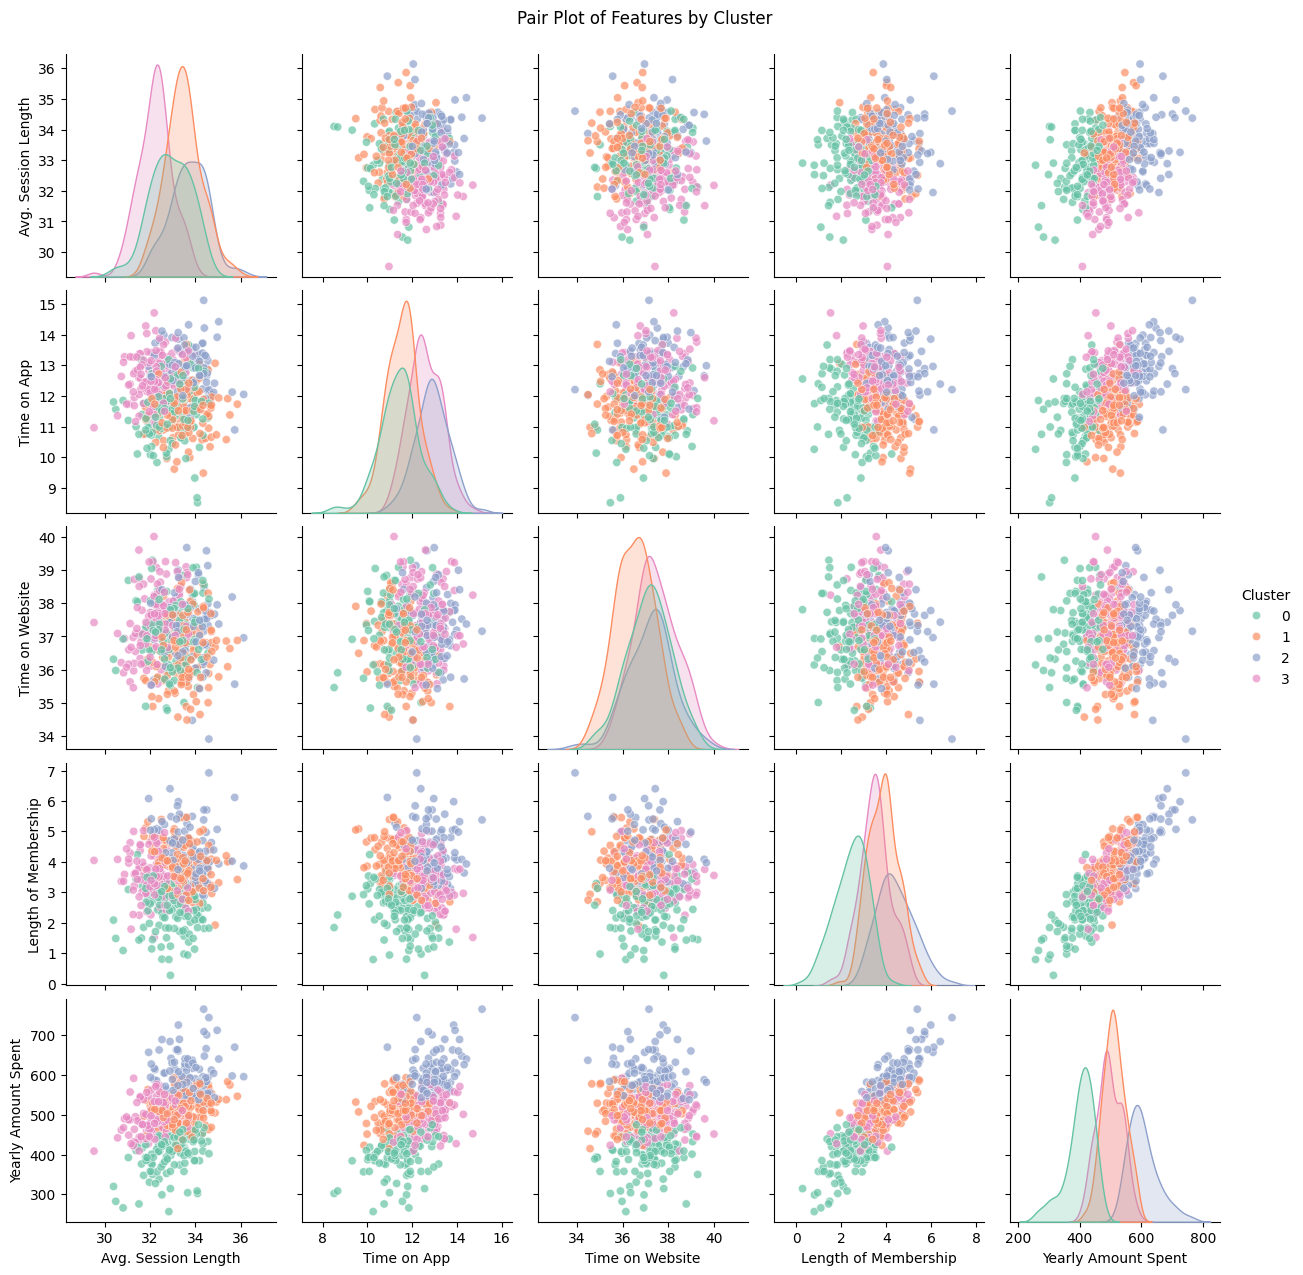

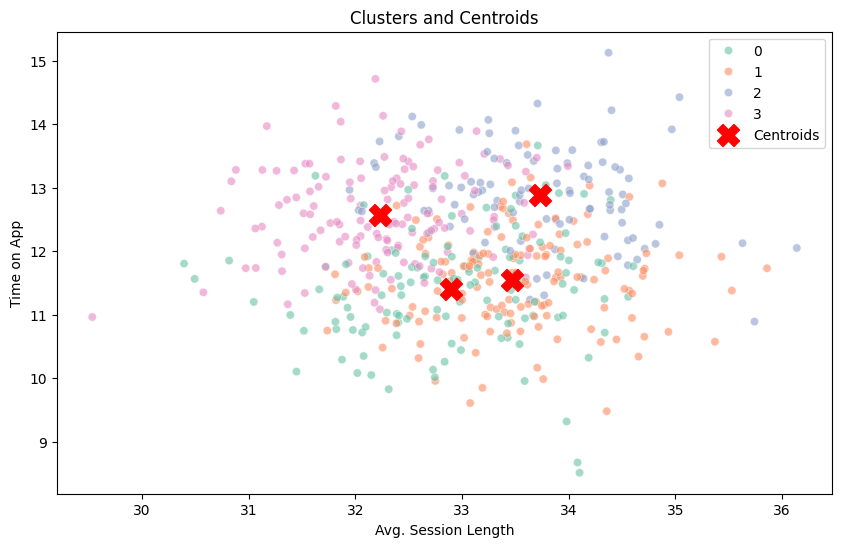

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def main():
    # Step 1: Load the dataset
    url = 'https://raw.githubusercontent.com/araj2/customer-database/master/Ecommerce%20Customers.csv'
    data = pd.read_csv(url)

    print("Shape of the dataset:", data.shape)
    print("\nMissing values per column:\n", data.isnull().sum())
    print("\nNumber of duplicate rows:", data.duplicated().sum())
    print("\nData types:\n", data.dtypes)
    print("\nSummary statistics:\n", data.describe())


    features = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']
    df_features = data[features]

    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df_features)

    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
        kmeans.fit(scaled_features)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method For Optimal Number of Clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.xticks(range(1, 11))
    plt.grid(True)
    plt.show()

    optimal_clusters = 4
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_features)

    data['Cluster'] = cluster_labels

    print("\nCluster counts:")
    print(data['Cluster'].value_counts())


    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_features)
    pca_df = pd.DataFrame(data = pca_result, columns = ['PC1', 'PC2'])
    pca_df['Cluster'] = cluster_labels

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set2', data=pca_df, s=60, alpha=0.8)
    plt.title('Customer Segments visualized via PCA')
    plt.legend(title='Cluster')
    plt.show()

    sns.pairplot(data, vars=features, hue='Cluster', palette='Set2', diag_kind='kde', plot_kws={'alpha':0.7})
    plt.suptitle('Pair Plot of Features by Cluster', y=1.02)
    plt.show()

    centroids_scaled = kmeans.cluster_centers_
    centroids_original = scaler.inverse_transform(centroids_scaled)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=features[0], y=features[1], hue='Cluster', palette='Set2', data=data, alpha=0.6)
    plt.scatter(centroids_original[:, 0], centroids_original[:, 1], s=250, color='red', marker='X', label='Centroids')
    plt.title('Clusters and Centroids')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()